In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam_ham.csv')
df.shape

(5572, 2)

In [3]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
len(df['message'][0])

111

In [11]:
len(df['message'][1])

29

In [12]:
len(df['message'][2])

155

<AxesSubplot:xlabel='type', ylabel='count'>

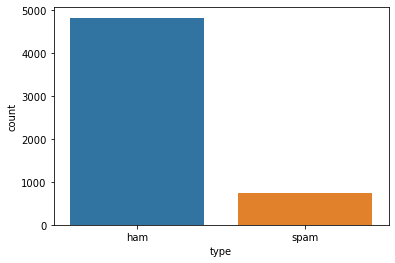

In [14]:
sns.countplot(data=df, x='type')

## Preprocessing

In [15]:
# pip install nltk

In [34]:
import nltk, re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [40]:
email = 'I, an Nigerian Prince of need help. Send the money. !!!! hello'
email = email.lower()
email = re.sub("[^a-z0-9 ]+", "", email)
email = word_tokenize(email)
email

['i',
 'an',
 'nigerian',
 'prince',
 'of',
 'need',
 'help',
 'send',
 'the',
 'money',
 'hello']

In [32]:
re.sub("[^a-z0-9 ]+", "", email)

'i an nigerian prince of need help send the money  hello'

In [39]:
sw = stopwords.words('english')
len(sw)

179

In [42]:
email = [word for word in email if word not in sw]
email

['nigerian', 'prince', 'need', 'help', 'send', 'money', 'hello']

In [43]:
" ".join(email)

'nigerian prince need help send money hello'

In [44]:
sw = stopwords.words('english')

def clean_text(email):
    email = email.lower()
    email = re.sub("[^a-z0-9 ]+", "", email)
    email = word_tokenize(email)
    email = [word for word in email if word not in sw]
    return " ".join(email)
    

In [45]:
clean_text('Hello, My name is john.')

'hello name john'

In [53]:
df['message'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [54]:
clean_text(df['message'][4])

'nah dont think goes usf lives around though'

In [58]:
df['clean_text'] = df['message'].apply(clean_text)

In [59]:
df.head()

,type,message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [60]:
from collections import Counter

In [73]:
ham = df[df['type'] == 'ham']['clean_text']
spam = df[df['type'] == 'spam']['clean_text']

In [74]:
ham = " ".join(ham)

In [76]:
ham = word_tokenize(ham)

In [79]:
ham_count =  Counter(ham)
ham_count.most_common(20)

[('u', 971),
 ('im', 458),
 ('2', 305),
 ('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 268),
 ('go', 247),
 ('got', 243),
 ('ur', 240),
 ('ill', 240),
 ('know', 232),
 ('like', 229),
 ('call', 229),
 ('come', 224),
 ('good', 222),
 ('time', 189),
 ('day', 187),
 ('love', 185),
 ('4', 168)]

In [80]:
spam = " ".join(spam)

In [81]:
spam = word_tokenize(spam)

In [82]:
spam_count =  Counter(spam)
spam_count.most_common(20)

[('call', 347),
 ('free', 216),
 ('2', 173),
 ('txt', 150),
 ('u', 147),
 ('ur', 144),
 ('mobile', 123),
 ('text', 120),
 ('4', 119),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101),
 ('prize', 92),
 ('get', 83),
 ('new', 69),
 ('send', 67),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60)]

In [85]:
df['type'] = df['type'].astype('category').cat.codes

In [87]:
df.head()

,type,message,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [92]:
X = df['clean_text'].values
y = df['type'].values

In [88]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
X_train.shape, y_train.shape

((3733,), (3733,))

In [96]:
X_test.shape

(1839,)

In [98]:
X_train

array(['aight text youre back mu ill swing need somebody get door',
       'cant wait see photos useful', 'kothi print marandratha', ...,
       'prabhaim sorydarealyfrm heart im sory',
       'nt joking seriously told', 'work going min'], dtype=object)

Let's say:
The probability of dangerous fires are rare (1%) 
but smoke is fairly common (10%) due to barbecues,
and 90% of dangerous fires make smoke
Can you find the probability of dangerous Fire when there is Smoke?

1. 0.09
2. 0.9
3. 0.3
4. 0.1

In [103]:
(y_train==1).sum()/ y_train.shape[0]

0.1326011251004554

In [104]:
(y_train==0).sum()/ y_train.shape[0]

0.8673988748995446

In [108]:
df[df['type'] == 1]

,type,message,clean_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 weeks word back id like ...
8,1,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,1,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",six chances win cash 100 20000 pounds txt csh1...
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,want explicit sex 30 secs ring 02073162414 cos...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,asked 3mobile 0870 chatlines inclu free mins i...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,contract mobile 11 mnths latest motorola nokia...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,reminder o2 get 250 pounds free call credit de...


In [109]:
from sklearn.feature_extraction.text import CountVectorizer # bag of words

In [112]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [113]:
X_train

<3733x7428 sparse matrix of type '<class 'numpy.int64'>'
	with 31467 stored elements in Compressed Sparse Row format>

In [128]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [131]:
X_test = vectorizer.transform(X_test)

In [132]:
X_test

<1839x7428 sparse matrix of type '<class 'numpy.int64'>'
	with 13667 stored elements in Compressed Sparse Row format>

In [176]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [134]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [136]:
y_pred = bnb.predict(X_test)

In [137]:
from sklearn.metrics import f1_score

In [139]:
f1_score(y_train, bnb.predict(X_train) )

0.93475935828877

In [138]:
f1_score(y_test, y_pred)

0.8755555555555555

In [177]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [178]:
y_pred = mnb.predict(X_test)

In [179]:
f1_score(y_train, mnb.predict(X_train) )

0.9766970618034448

In [180]:
f1_score(y_test, y_pred)

0.9195876288659793

# Hyper-parameter tuning (alpha)

In [202]:
# params = {
#     'alpha' : [0.1, 1.0, 5, 10, 20, 50]
# }

# params = {
#     'alpha' : [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5]
# }

params = {
    'alpha' : [2, 2.5, 3, 3.5]
}

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
model = MultinomialNB()

clf = GridSearchCV(model, param_grid=params, scoring='f1', cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [2, 2.5, 3, 3.5]}, scoring='f1')

In [205]:
res = clf.cv_results_

In [206]:
res['mean_test_score']

array([0.90246406, 0.91110719, 0.91144405, 0.91254649])

In [207]:
model = MultinomialNB(alpha=3)
model.fit(X_train, y_train)

MultinomialNB(alpha=3)

In [208]:
y_pred = model.predict(X_test)

In [209]:
f1_score(y_train, model.predict(X_train) )

0.9668737060041407

In [210]:
f1_score(y_test, y_pred)

0.9201680672268907